# Part 0: Intro to Numpy/Scipy

[Numpy](http://www.numpy.org/) is a Python module that provides fast primitives for multidimensional arrays. It's well-suited to implementing numerical linear algebra algorithms, and for those can be much faster than Python's native list and dictionary types when you only need to store and operate on numerical data.

Some of the material from this lesson is copied from the following, and more comprehensive, tutorial: [link](http://www.scipy-lectures.org/intro/numpy/index.html)

**Quick demo.** The recommended importing idiom is:

In [1]:
import numpy as np
print(np.__version__)

1.13.3


## Creating a simple numpy array

In [2]:
a = np.array([1,2,3,4])
print(a)

[1 2 3 4]


## Why bother with Numpy? A motivating example

We already have lists and dictionary types, which are pretty easy to use and very flexible. So why bother with this special type?

**Exercise 0** (ungraded). One reason to consider Numpy is that it "can be much faster," as noted above. But how much faster is that? Run the experiment below to see.

In [3]:
n = 1000000

In [4]:
L = range(n)
%timeit [i**2 for i in L]

351 ms ± 98.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
np.arange(10) # Moral equivalent to `range`

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
A = np.arange(n)
%timeit A**2

1.28 ms ± 78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Creating multidimensional arrays

Beyond simple arrays, Numpy supports multidimensional arrays. To do more than one dimension, call `numpy.array()` but nest each new dimension within a list. It's easiest to see by example.

In [7]:
# Create a two-dimensional array of size 3 rows x 4 columns:
B = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11]])

print(B)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [8]:
print(B.ndim) # What does this do?
print(B.shape) # What does this do?
print(len (B)) # What does this do?

2
(3, 4)
3


In [9]:
C1 = [[0, 1, 2, 3],
      [4, 5, 6, 7],
      [8, 9, 10, 11]]

C2 = [[12, 13, 14, 15],
      [16, 17, 18, 19],
      [20, 21, 22, 23]]

C = np.array([C1, C2])

print(C)
print(C.ndim)
print(C.shape)
print(len (C))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
3
(2, 3, 4)
2


There are routines for creating various kinds of structured matrices as well, which are similar to those found in [MATLAB](http://www.mathworks.com/products/matlab/) and [Octave](https://www.gnu.org/software/octave/).

In [10]:
print(np.zeros((3, 4)))

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [11]:
print(np.ones((3, 4)))

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [12]:
print(np.eye(3))

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [13]:
print(np.diag([1, 2, 3]))

[[1 0 0]
 [0 2 0]
 [0 0 3]]


You can also create empty (uninitialized) arrays. What does the following produce?

In [14]:
A = np.empty((3, 4)) # An "empty" 3 x 4 matrix
print(A)

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


**Exercise 1** (ungraded). The following code creates an identity matrix in two different ways, which are found to be equal according to the assertion. But in fact there is a subtle difference between the `I` and `I_u` matrices created below; can you spot it?

In [15]:
n = 3
I = np.eye(n)

print("==> I = eye(n):")
print(I)

u = [1] * n
I_u = np.diag(u)

print("\n==> u:\n", u)
print("==> I_u = diag (u):\n", I_u)

assert np.all(I_u == I)

==> I = eye(n):
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]

==> u:
 [1, 1, 1]
==> I_u = diag (u):
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


**Answer.** Give this some thought before you read the answer that follows!

The difference is in the element types. The `eye()` function returns an identity matrix and uses a floating-point type as the element type. By contrast, `diag()`, which expects a list of initializer values upon input, derives the element type from that input. In this case, `u` contains values that will be stored as integers; therefore, `diag()` constructs its output assuming integer elements.

Try running `print(I_u.dtype)` and `print(I.dtype)` to confirm that these element types differ.

## Indexing and slicing

The usual 0-based slicing and indexing notation you know and love from lists is also supported for Numpy arrays. In the multidimensional case,  including their natural multidimensional analogues with index ranges separated by commas.

In [16]:
# Recall: C
print (C)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


What part of C will the following slice extract? Run the code to find out.

In [17]:
print (C[0, 2, :])

[ 8  9 10 11]


What will the following slice return? Run the code to find out.

In [18]:
print (C[1, 0, ::-1])

[15 14 13 12]


**Exercise 2** (5 points). Consider the following $6 \times 6$ matrix, which has 4 different subsets highlighted.

<img src="https://github.com/cse6040/labs-fa17/raw/master/lab10-numpy/slicing-exercise.png" alt="Exercise: Extract these slices" width="240">

For each subset illustrated above, write an indexing or slicing expression that extracts the subset. Store the result of each slice into `Z_green`, `Z_red`, `Z_orange`, and `Z_cyan`.

In [19]:
Z= np.array([[0,1,2,3,4,5],[10,11,12,13,14,15],[20,21,22,23,24,25],[30,31,32,33,34,35],[40,41,42,43,44,45],[50,51,52,53,54,55]])

# Construct `Z_green`, `Z_red`, `Z_orange`, and `Z_cyan`:
###
Z_green = [Z[2, [0, 2, 4]], Z[4, [0, 2, 4]]]
Z_red = Z[:, 2]
Z_orange = Z[0, 3:5]
Z_cyan = Z[-2:, -2:]
###


In [20]:
# Test cell: `check_Z`

print("==> Z:\n", Z)
assert (Z == np.array([np.arange(0, 6),
                       np.arange(10, 16),
                       np.arange(20, 26),
                       np.arange(30, 36),
                       np.arange(40, 46),
                       np.arange(50, 56)])).all()

print("\n==> Orange slice:\n", Z_orange)
assert (Z_orange == np.array ([3, 4])).all()

print("\n==> Red slice:\n", Z_red)
assert (Z_red == np.array ([2, 12, 22, 32, 42, 52])).all()

print("\n==> Cyan slice:\n", Z_cyan)
assert (Z_cyan == np.array ([[44, 45], [54, 55]])).all()

print("\n==> Green slice:\n", Z_green)
assert (Z_green == np.array ([[20, 22, 24], [40, 42, 44]])).all()

print("\n(Passed!)")

==> Z:
 [[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]

==> Orange slice:
 [3 4]

==> Red slice:
 [ 2 12 22 32 42 52]

==> Cyan slice:
 [[44 45]
 [54 55]]

==> Green slice:
 [array([20, 22, 24]), array([40, 42, 44])]

(Passed!)


## Slices are views

To help save memory, when you slice a Numpy array, you are actually creating a _view_ into that array. That means modifications through the view will modify the original array.

In [21]:
print("==> Recall C: %s" % str(C.shape))
print(C)

==> Recall C: (2, 3, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [22]:
C_view = C[1, 0::2, 1::2] # Question: What does this produce?
print ("==> C_view: %s" % str (C_view.shape))
print (C_view)

==> C_view: (2, 2)
[[13 15]
 [21 23]]


In [23]:
C_view[:, :] = -C_view[::-1, ::-1] # Question: What does this do?
print (C_view)

[[-23 -21]
 [-15 -13]]


In [24]:
# A (to above question): 
# This applies the scalar -1 to all elements of the matrix
# and inverts the order 

In [25]:
print (C)

[[[  0   1   2   3]
  [  4   5   6   7]
  [  8   9  10  11]]

 [[ 12 -23  14 -21]
  [ 16  17  18  19]
  [ 20 -15  22 -13]]]


You can force a copy using the `.copy()` method:

In [26]:
C_copy = C[1, 0::2, 1::2].copy ()
C_copy[:, :] = -C_copy[::-1, ::-1]

print ("==> C_view:")
print (C_view)

print ("\n==> C_copy:")
print (C_copy)

==> C_view:
[[-23 -21]
 [-15 -13]]

==> C_copy:
[[13 15]
 [21 23]]


And to check whether two Numpy array variables point to the same object, you can use the `numpy.may_share_memory()` function:

In [27]:
print ("C and C_view share memory: %s" % np.may_share_memory (C, C_view))
print ("C and C_copy share memory: %s" % np.may_share_memory (C, C_copy))

C and C_view share memory: True
C and C_copy share memory: False


## Indirect addressing

Two other common ways to index a Numpy array are to use a boolean mask or to use a set of integer indices.

In [28]:
np.random.seed(3)
x = np.random.randint(0, 20, 15) # 15 random ints in [0, 20)
print(x)

[10  3  8  0 19 10 11  9 10  6  0 12  7 14 17]


In [29]:
# Pull out an arbitrary subset of elements
inds = np.array([3, 7, 8, 12])
print(x[inds])

[ 0  9 10  7]


Before looking at how to use a boolean mask for indexing, let's create one.

**Exercise 3** (1 point). Given the input array, `x[:]`, above, create an array, `mask_mult_3[:]` such that `mask_mult_3[i]` is true only if `x[i]` is a positive multiple of 3.

In [30]:
###
mask_mult_3 = [True if x_i%3 == 0 and x_i > 0 else False for i, x_i in enumerate(x)]
x[mask_mult_3]
###


array([ 3,  9,  6, 12])

In [31]:
x[mask_mult_3]%3

array([0, 0, 0, 0])

In [32]:
np.zeros(sum(mask_mult_3))

array([ 0.,  0.,  0.,  0.])

In [33]:
# Test cell: `mask_mult_3_test`

print ("x:", x)
print ("mask_mult_3:", mask_mult_3)
print ("==> x[mask_mult_3]:", x[mask_mult_3])

inv_mask_mult_3 = np.invert (mask_mult_3)

assert ((x[mask_mult_3] % 3) == np.zeros (sum (mask_mult_3))).all ()
assert (((x[inv_mask_mult_3] % 3) != np.zeros (sum (inv_mask_mult_3))) | (x[inv_mask_mult_3] == 0)).all ()

x: [10  3  8  0 19 10 11  9 10  6  0 12  7 14 17]
mask_mult_3: [False, True, False, False, False, False, False, True, False, True, False, True, False, False, False]
==> x[mask_mult_3]: [ 3  9  6 12]


**Exercise 4** (3 points). Complete the prime number sieve algorithm, which is illustrated below.

<img src="https://github.com/cse6040/labs-fa17/raw/master/lab10-numpy/prime-sieve.png" alt="Exercise: Extract these slices" width="480">

That is, given a positive integer $n$, the algorithm iterates from $i \in \{2, 3, 4, \ldots, \left\lfloor\sqrt{n}\right\rfloor\}$, repeatedly "crossing out" values that are strict multiples of $i$. "Crossing out" means maintaining an array of, say, booleans, and setting values that are multiples of $i$ to `False`.

In [34]:
from math import sqrt, ceil
import numpy as np

### Wikipedia - Seive of Eratosthenes (to check for prime numbers)
https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes

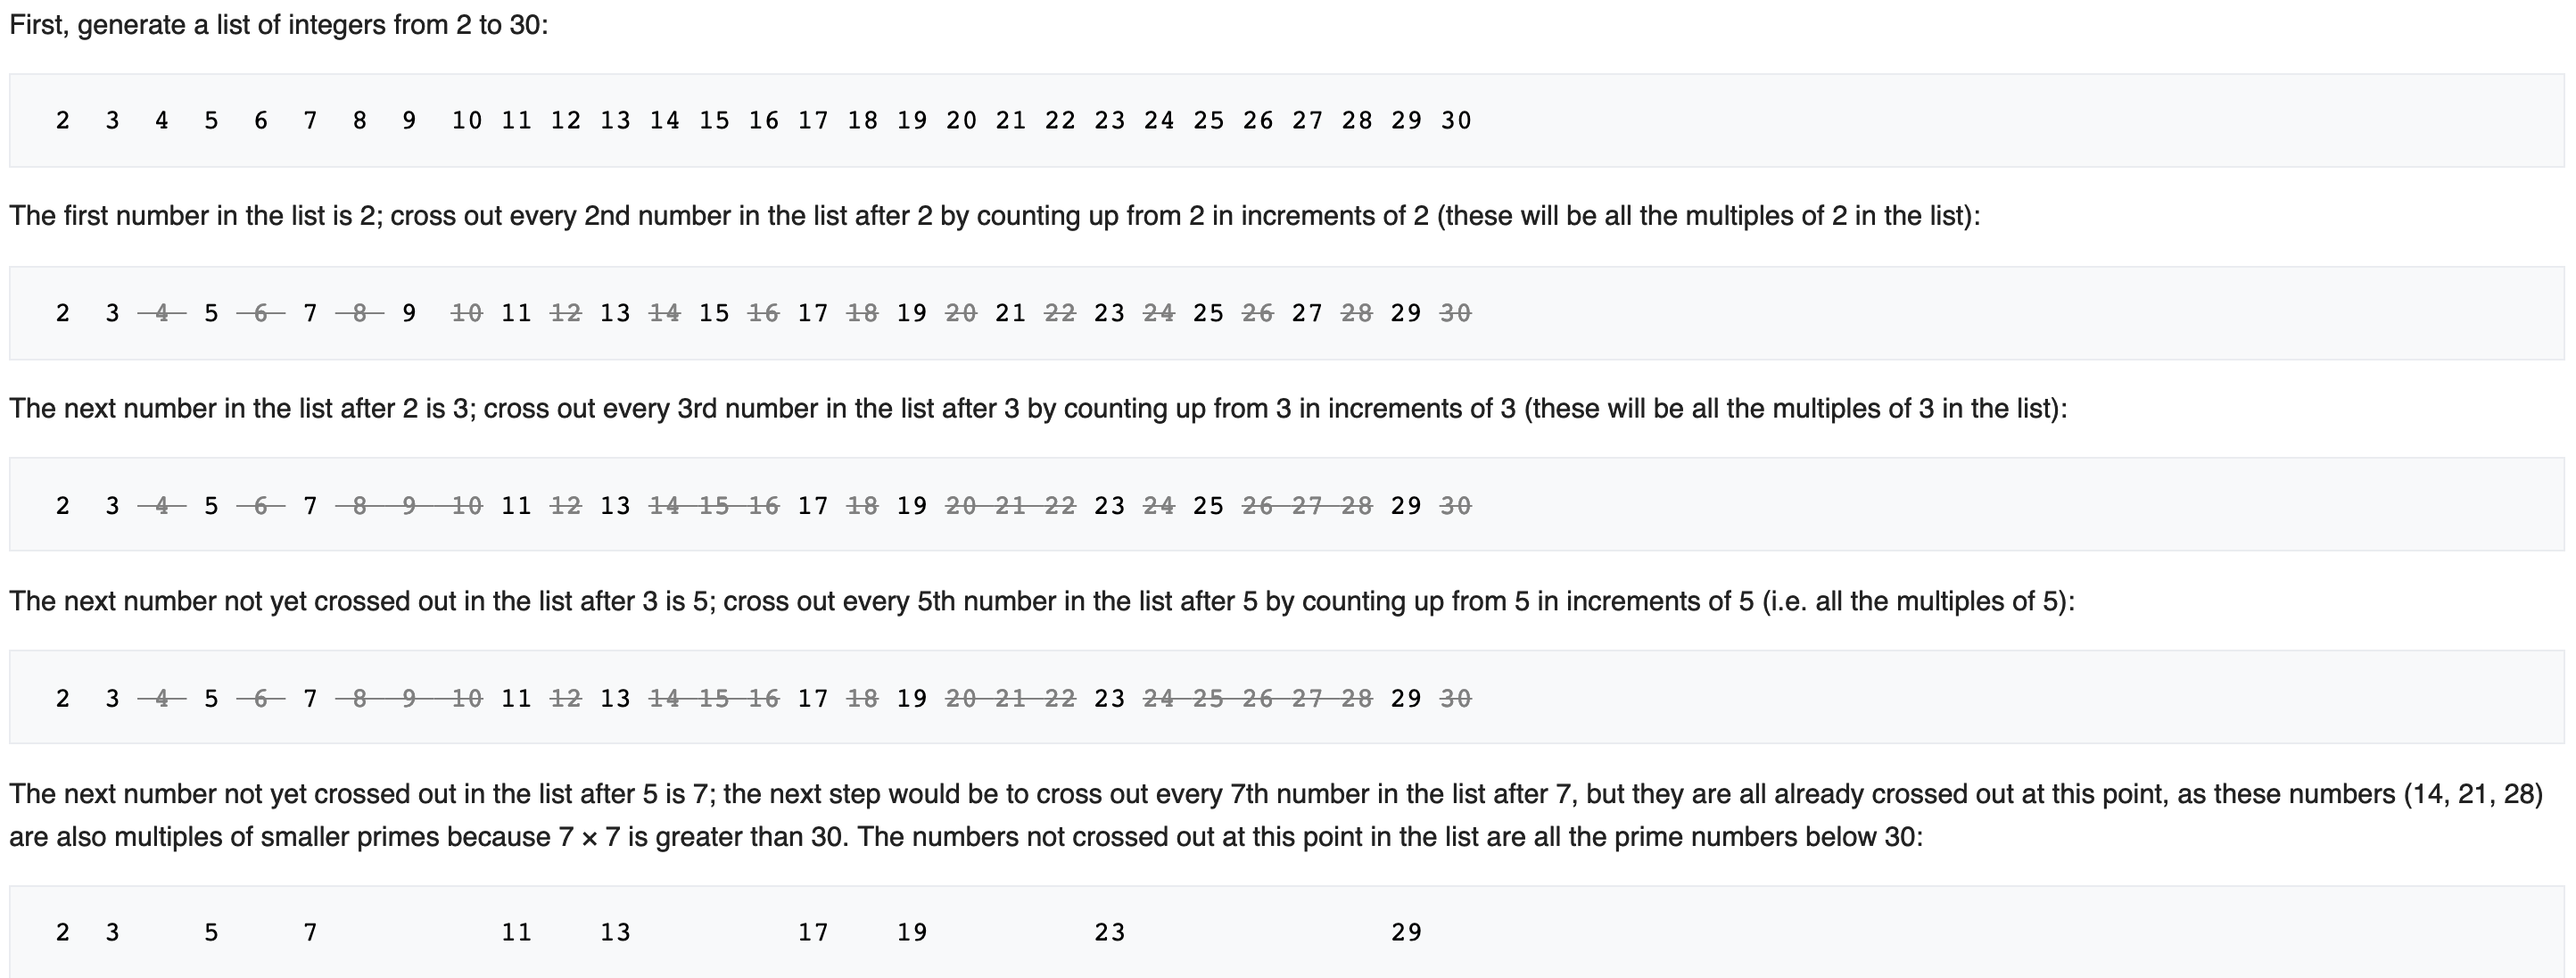

In [35]:
from math import sqrt, ceil
import numpy as np

def sieve(n:int) -> list:
    """
    Returns the prime number 'sieve' shown above.
    
    That is, this function returns an array `X[0:n+1]`
    such that `X[i]` is true if and only if `i` is prime.
    """
    is_prime = np.empty(n+1, dtype=bool) # the "sieve"

    # Initial values
    is_prime[0:2] = False # {0, 1} are _not_ considered prime
    is_prime[2:] = True # All other values might be prime, start by assuming they are prime, replace with F if not

    # Implement the sieving loop
    ###
    # Create a list with integers from 0 through n
    a = list(range(n+1))
    # Leave off 0 and 1 since they're not considered prime numbers
    a = a[2:]
    
    # Create a copy of the list to ensure that we can update it as we eliminate non-prime numbers
    b = a.copy()
    for i, elem in enumerate(a):
        # get multiples
        mults = a[i::elem]
        
        # eliminate the elements in b that are non-prime, keeping only the prime numbers
        b = [B for B in b if B not in mults[1:]]
    
    # Get indices for a for which the number is a prime number
    idx_in_a = [i for i, x in enumerate(a) if x in b]
    is_prime[2:] = [True if i in idx_in_a else False for i, prime in enumerate(is_prime[2:])]
    
    return is_prime
    ###
    
# Prints your primes
print("==> Primes through 20:\n", np.nonzero(sieve(20))[0])

==> Primes through 20:
 [ 2  3  5  7 11 13 17 19]


In [36]:
# Test cell: `prime_sieve_test`

is_prime = sieve(20)
assert len (is_prime) == 21
assert (is_prime == np.array([False, False, True, True, False, True, False, True, False, False, False, True, False, True, False, False, False, True, False, True, False])).all()

**Fin!** If you've reached this point and everything executed without error, you can submit this part and move on to the next one.